In [1]:
# Importamos las bibliotecas que vamos a usar
import pandas as pd
import ipywidgets as widgets
from ipyleaflet import Map, MagnifyingGlass, basemaps, basemap_to_tiles, Marker

In [4]:
data = pd.read_csv('data/gdp_data.csv')
data

,Country,Code,Year,GDP-Growth,GDP-Per-Capita,GDP
0,Aruba,ABW,1960,NaN,NaN,NaN
1,Afghanistan,AFG,1960,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,NaN
...,...,...,...,...,...,...
15043,Kosovo,XKX,2016,4.145372,4193.631327,7.738508e+09
15044,"Yemen, Rep.",YEM,2016,-2.701475,667.945437,1.903557e+10
15045,South Africa,ZAF,2016,0.787056,7439.919412,4.298757e+11
15046,Zambia,ZMB,2016,3.794901,1672.345428,2.901824e+10


In [5]:
paises_sud = ['Colombia', 'Ecuador', 'Peru', 'Bolivia', 'Venezuela', 'Chile', 'Argentina', 'Paraguay', 'Brazil', 'Uruguay')]

In [26]:
data_sud = data[data.Country.isin(paises_sud)]
data_sud

,Country,Code,Year,GDP-Growth,GDP-Per-Capita,GDP
7,Argentina,ARG,1960,-0.852022,5711.179338,1.208089e+11
26,Bolivia,BOL,1960,5.578918,1042.064019,3.962959e+09
27,Brazil,BRA,1960,5.216059,3740.433280,2.861967e+11
37,Chile,CHL,1960,4.026686,3794.010773,3.216144e+10
43,Colombia,COL,1960,5.411890,2432.061670,4.157103e+10
...,...,...,...,...,...,...
14821,Chile,CHL,2016,4.024653,15130.154322,2.833751e+11
14827,Colombia,COL,2016,2.658121,7698.412245,3.822160e+11
14848,Ecuador,ECU,2016,1.377127,5185.091461,8.858395e+10
14977,Paraguay,PRY,2016,3.637827,5394.461414,3.752426e+10


In [74]:
opciones = [(d, d) for d in paises_sud]
opciones.sort()

In [76]:
pais = widgets.Dropdown(
    options = opciones,
    value='Argentina',
    description='País:'
)

pais

Dropdown(description='País:', options=(('Argentina', 'Argentina'), ('Bolivia', 'Bolivia'), ('Brazil', 'Brazil'…

In [77]:
datos_x_pais = data_sud[data_sud['Country'] == pais.value]
datos_x_pais.head(5)

,Country,Code,Year,GDP-Growth,GDP-Per-Capita,GDP
37,Chile,CHL,1960,4.026686,3794.010773,3.216144e+10
301,Chile,CHL,1961,5.840140,3935.050723,3.403971e+10
565,Chile,CHL,1962,2.557221,3957.236913,3.491018e+10
829,Chile,CHL,1963,0.950273,3920.290297,3.524192e+10
1093,Chile,CHL,1964,11.236242,4283.017607,3.920179e+10


<AxesSubplot:xlabel='Year'>

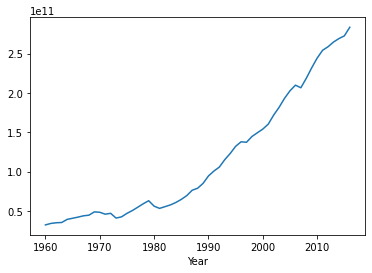

In [78]:
datos_x_pais.groupby("Year")['GDP'].sum().plot(kind="line")

<AxesSubplot:xlabel='Year'>

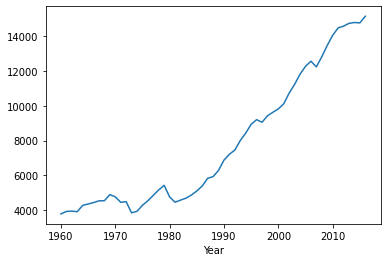

In [79]:
datos_x_pais.groupby("Year")['GDP-Per-Capita'].sum().plot(kind="line")

In [72]:
years = [(str(d), d) for d in range (1960, 2017)]
years.sort()

In [73]:
year = widgets.Dropdown(
    options = years,
    value=2016,
    description='Año:'
)

year

Dropdown(description='Año:', index=56, options=(('1960', 1960), ('1961', 1961), ('1962', 1962), ('1963', 1963)…

In [65]:
datos_x_pais = data_sud[data_sud['Year'] == year.value]
datos_x_pais

,Country,Code,Year,GDP-Growth,GDP-Per-Capita,GDP
14791,Argentina,ARG,2016,-2.514590,10040.130736,4.467306e+11
14810,Bolivia,BOL,2016,4.223625,2559.511317,2.905850e+10
14811,Brazil,BRA,2016,1.117579,11026.242161,2.309660e+12
14821,Chile,CHL,2016,4.024653,15130.154322,2.833751e+11
14827,Colombia,COL,2016,2.658121,7698.412245,3.822160e+11
14848,Ecuador,ECU,2016,1.377127,5185.091461,8.858395e+10
14977,Paraguay,PRY,2016,3.637827,5394.461414,3.752426e+10
15032,Uruguay,URY,2016,1.620084,14617.464001,5.042000e+10


<AxesSubplot:xlabel='Country'>

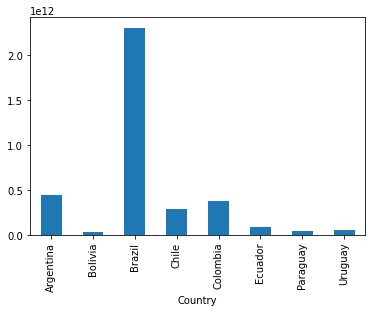

In [66]:
datos_x_pais.groupby("Country")['GDP'].sum().plot(kind="bar")

<AxesSubplot:xlabel='Country'>

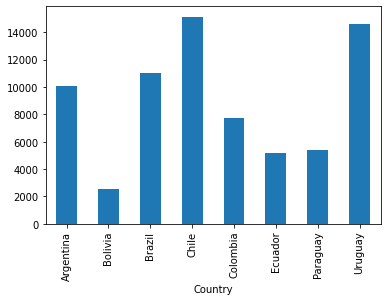

In [67]:
datos_x_pais.groupby("Country")['GDP-Per-Capita'].sum().plot(kind="bar")